In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 분류

- classification 모델 사용
- 평가 지표 : 올바르게 에측했는지가 중요
    - accuracy : 정확도
    - precision : 정밀도
    - recall : 재현율, 민감도
    - specitify : 특이도
    - f1-score

In [2]:
data = sns.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

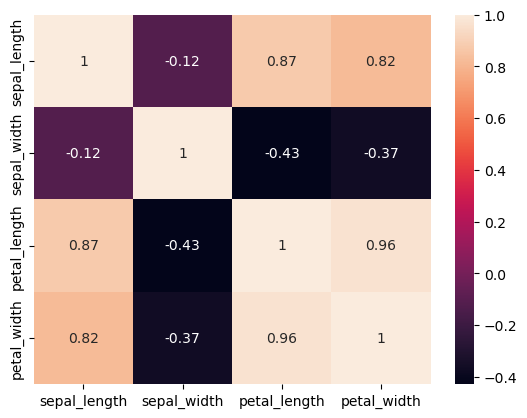

In [7]:
sns.heatmap(data.corr(),
           annot = True)

## 데이터 분리

In [8]:
target= 'species'
x=data.drop(target, axis = 1)
y = data.loc[:,target]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 모델링

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0  8  0]
 [ 0  2 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.80      1.00      0.89         8
   virginica       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.93      0.96      0.94        45
weighted avg       0.96      0.96      0.96        45



# 회귀

- Regression 모델 사용
- 평가 지표 : 오차를 줄이는 것이 목표
    - SSE(Sum Squared Error)
    - MSE(Mean Squared Error)
    - RMSE(Root MSE)
    - MAE(Mean Absolute Error)
    - MAPE(Mean Absolute Percentage Error) 

In [11]:
data = sns.load_dataset('car_crashes')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [13]:
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [14]:
data.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [15]:
data.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<AxesSubplot:>

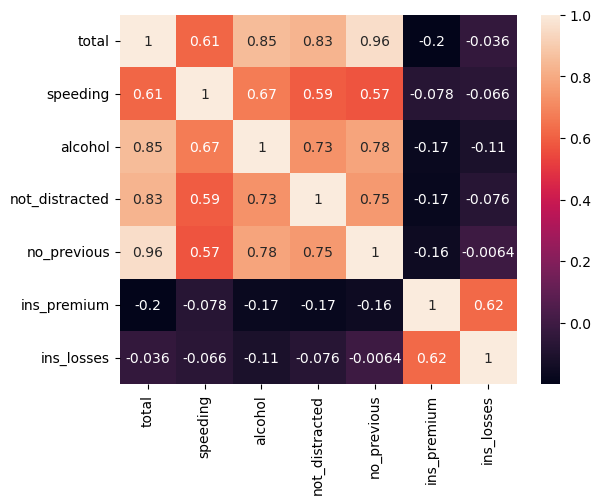

In [16]:
sns.heatmap(data.corr(),
           annot = True)

In [17]:
data.isna().sum()

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

## 데이터 분리

In [18]:
target = 'total'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [19]:
dumm_cols =['abbrev']

x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)
x.head()

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev_AL,abbrev_AR,abbrev_AZ,abbrev_CA,...,abbrev_SD,abbrev_TN,abbrev_TX,abbrev_UT,abbrev_VA,abbrev_VT,abbrev_WA,abbrev_WI,abbrev_WV,abbrev_WY
0,7.332,5.640,18.048,15.040,784.55,145.08,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.421,4.525,16.290,17.014,1053.48,133.93,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.510,5.208,15.624,17.856,899.47,110.35,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.032,5.824,21.056,21.280,827.34,142.39,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.200,3.360,10.920,10.680,878.41,165.63,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

## 모델링

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('MAE : ', mean_absolute_error(y_test, y_pred))
print('R2 : ', r2_score(y_test, y_pred))

MAE :  0.660450189550709
R2 :  0.978208570668978
